In [1]:
# Example data
from pydataset import data

# Data Processing
import pandas as pd
import numpy as np

# Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats for hypothesis testing
from scipy import stats

# sklearn preprocessing
from sklearn.model_selection import train_test_split

In [2]:
def split(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.3, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(df, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

# Exporatory Data Analysis for Alice's Restaurant

1. Planning Stage
2. Acquisition Stage (pretty straightforward for this specific data)
3. Data Preparation
4. Exploratoration Stage
    - Explore the distributions of each feature
    - Visualize how features move relative to each-other
    - Hypothesis testing

In [3]:
# Acquire Stage
df = data("tips")

In [4]:
# Prep Stage
df["bill_per_capita"] = df.total_bill / df["size"]
df["tip_per_capita"] = df.tip / df["size"]
df["table_size"] = df["size"]

df["tip_percentage"] = round(df.tip / df.total_bill, 3) * 100

df.drop(columns=["size"], inplace=True)

# Split
train, validate, test = split(df)
train.head()

,total_bill,tip,sex,smoker,day,time,bill_per_capita,tip_per_capita,table_size,tip_percentage
149,9.78,1.73,Male,No,Thur,Lunch,4.890,0.865,2,17.7
214,13.27,2.50,Female,Yes,Sat,Dinner,6.635,1.250,2,18.8
179,9.60,4.00,Female,Yes,Sun,Dinner,4.800,2.000,2,41.7
42,17.46,2.54,Male,No,Sun,Dinner,8.730,1.270,2,14.5
120,24.08,2.92,Female,No,Thur,Lunch,6.020,0.730,4,12.1


## First, Let's Get to Know Each Feature

In [5]:
train.sex.value_counts()

Male      109
Female     61
Name: sex, dtype: int64

In [6]:
train.smoker.value_counts()

No     105
Yes     65
Name: smoker, dtype: int64

<AxesSubplot:>

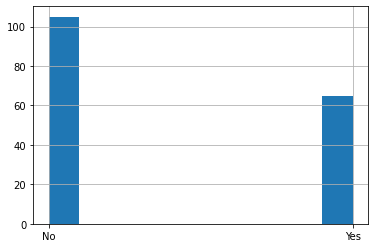

In [7]:
train.smoker.hist()

<AxesSubplot:>

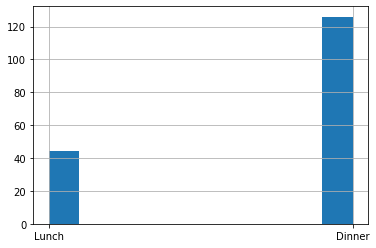

In [8]:
train.time.hist()

<AxesSubplot:>

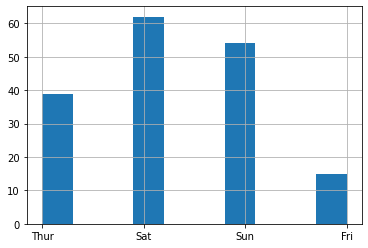

In [9]:
train.day.hist()

In [10]:
train.day.value_counts()

Sat     62
Sun     54
Thur    39
Fri     15
Name: day, dtype: int64

In [11]:
train.table_size.value_counts()

2    113
3     26
4     23
5      3
1      3
6      2
Name: table_size, dtype: int64

<AxesSubplot:>

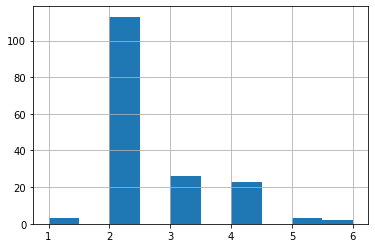

In [12]:
train.table_size.hist()

<AxesSubplot:>

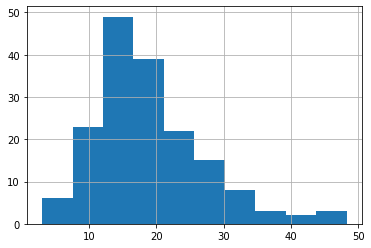

In [13]:
# Total Bill Histogram
train.total_bill.hist()

<AxesSubplot:>

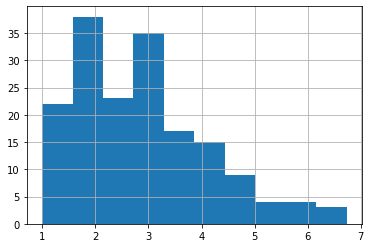

In [14]:
# Histogram of tip amount
train.tip.hist()

<AxesSubplot:>

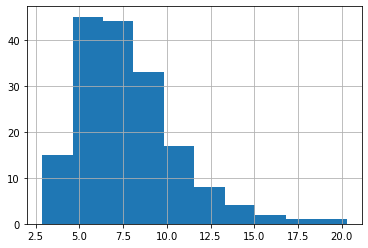

In [15]:
train.bill_per_capita.hist()

<AxesSubplot:>

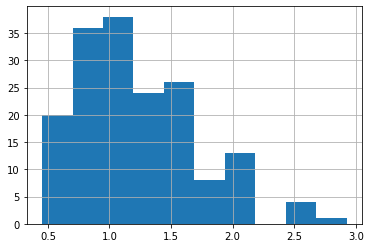

In [16]:
train.tip_per_capita.hist()

<AxesSubplot:>

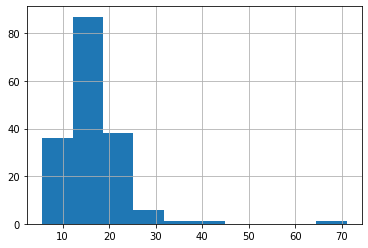

In [17]:
train.tip_percentage.hist()

<AxesSubplot:xlabel='bill_per_capita', ylabel='tip_per_capita'>

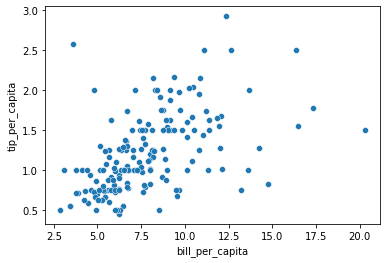

In [18]:
sns.scatterplot(x="bill_per_capita", y="tip_per_capita", data=train)

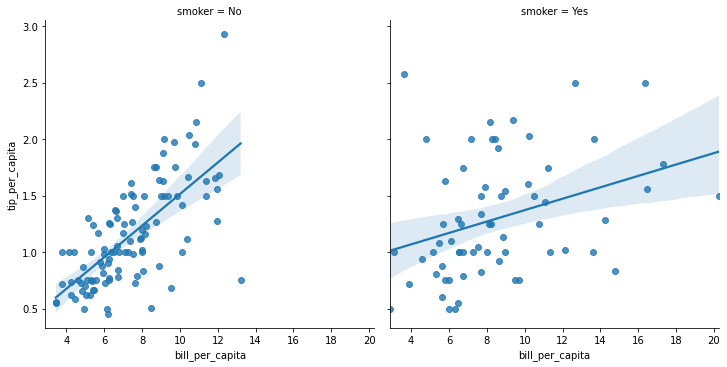

In [19]:
sns.lmplot(x="bill_per_capita", y="tip_per_capita", data=train, col="smoker")

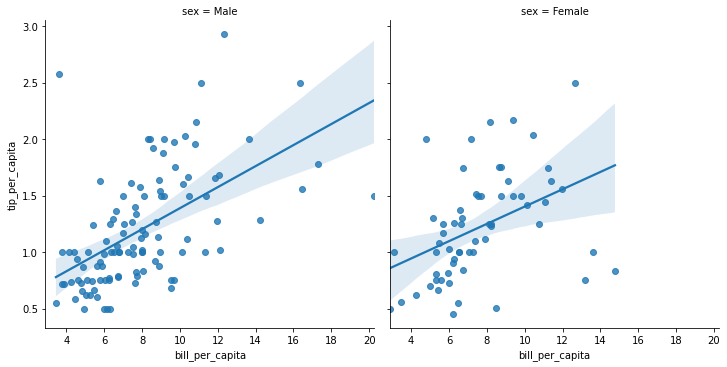

In [20]:
sns.lmplot(x="bill_per_capita", y="tip_per_capita", data=train, col="sex")

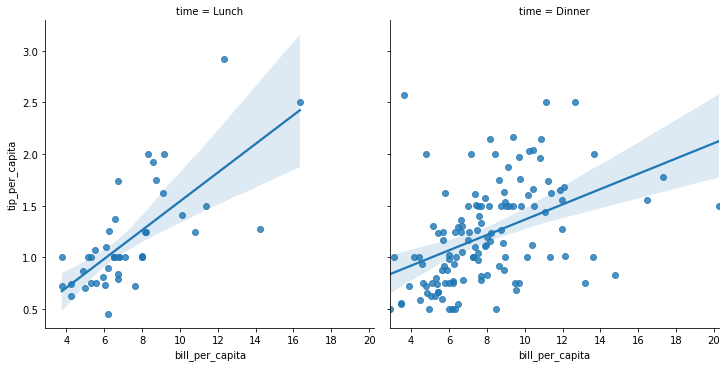

In [21]:
sns.lmplot(x="bill_per_capita", y="tip_per_capita", data=train, col="time")

In [22]:
train[train.smoker == "Yes"].bill_per_capita.mean(), train[train.smoker == "No"].bill_per_capita.mean(), 

(8.529730769230769, 7.389806349206349)

In [23]:
train[train.smoker == "Yes"].tip_per_capita.mean(), train[train.smoker == "No"].tip_per_capita.mean(), 

(1.2973333333333334, 1.1491158730158728)

In [24]:
train[train.smoker == "Yes"].tip_percentage.mean(), train[train.smoker == "No"].tip_percentage.mean(), 

(16.91692307692308, 15.70857142857143)

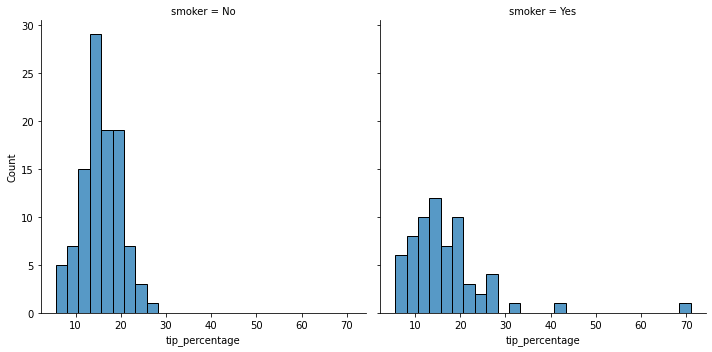

In [25]:
# Distributions of tip percentage by smoking status
sns.displot(data=train, x="tip_percentage", col="smoker")

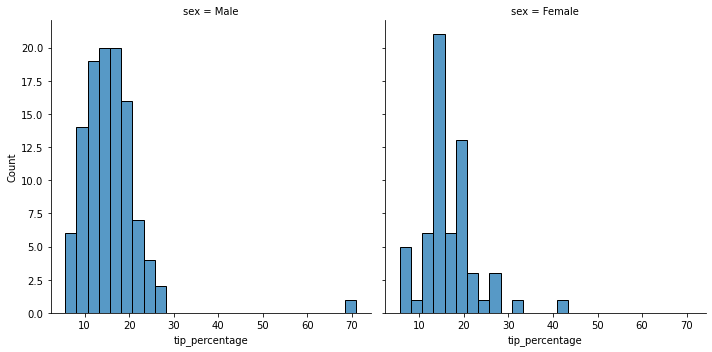

In [26]:
# Distributions of tip percentage by gender of payer
sns.displot(data=train, x="tip_percentage", col="sex")

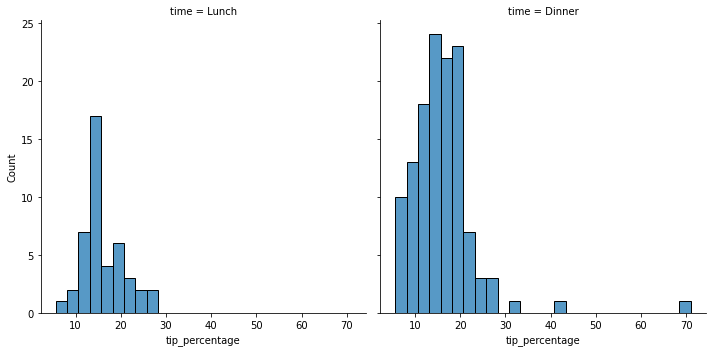

In [27]:
# Distributions of tip percentage by time of day
sns.displot(data=train, x="tip_percentage", col="time")

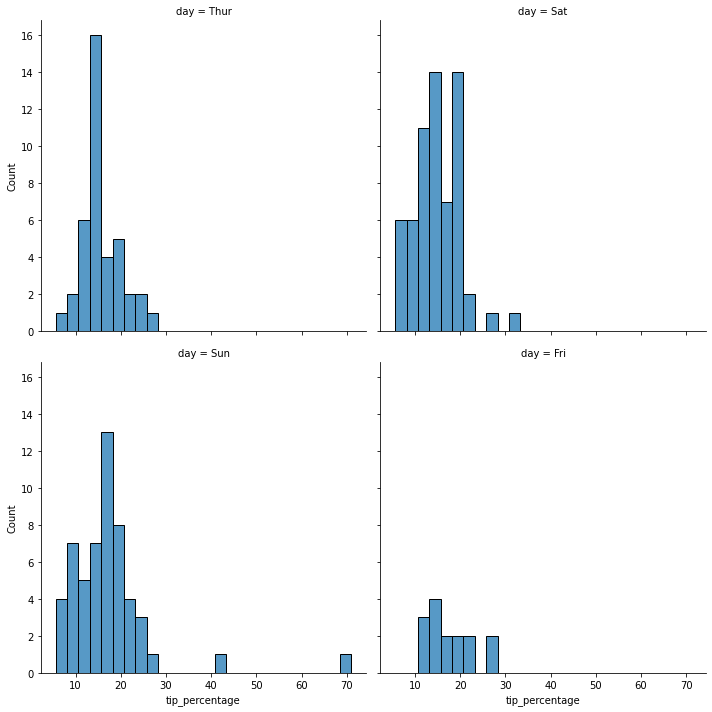

In [28]:
sns.displot(data=train, x="tip_percentage", col="day", col_wrap=2)

In [29]:
# Looks like Thursday is THE day for lunch and a crummy day for dinner.
thursday = train[train.day == "Thur"]
thursday.time.value_counts()

Lunch     38
Dinner     1
Name: time, dtype: int64

In [30]:
# Is there anything special about that Thursday Dinner table?
# Gosh! Why was the restaurant even open Thursday for dinner!
thursday[thursday.time == "Dinner"]

,total_bill,tip,sex,smoker,day,time,bill_per_capita,tip_per_capita,table_size,tip_percentage
244,18.78,3.0,Female,No,Thur,Dinner,9.39,1.5,2,16.0


In [31]:
# Friday is 3/2 more likely to be dinnertime
friday = train[train.day == "Fri"]
friday.time.value_counts()

Dinner    9
Lunch     6
Name: time, dtype: int64

In [32]:
# Looks like Saturday is dinner only
saturday = train[train.day == "Sat"]
saturday.time.value_counts()

Dinner    62
Name: time, dtype: int64

In [33]:
# Sunday is dinner only
sunday = train[train.day == "Sun"]
sunday.time.value_counts()

Dinner    54
Name: time, dtype: int64

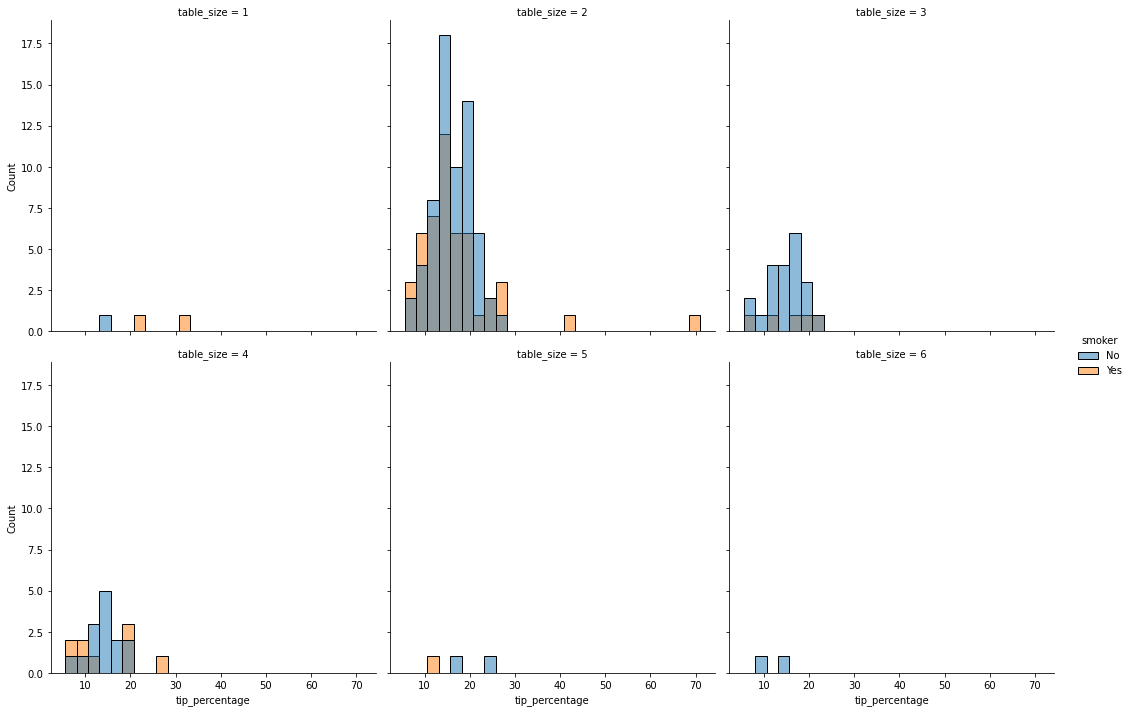

In [34]:
# Breakout by table_size the tip_percentage distributions
# Is there a table-size that tips better?
sns.displot(data=train, x="tip_percentage", col="table_size", col_wrap=3, hue="smoker")